In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#njobs = 4

In [136]:
# Get data
train = pd.read_csv("train.csv")
print("train : " + str(train.shape))

train : (1460, 81)


In [137]:
# Get data
test = pd.read_csv("test.csv")
print("test : " + str(test.shape))

test : (1459, 80)


In [138]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [139]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [140]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition'])) 

In [141]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [142]:
# Check for duplicates
idsUnique = len(set(train.Id))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

# Drop Id column
train.drop("Id", axis = 1, inplace = True)

There are 0 duplicate IDs for 1460 total entries


In [143]:
# Check for duplicates
idsUnique = len(set(test.Id))
idsTotal = test.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

# Drop Id column
test.drop("Id", axis = 1, inplace = True)

There are 0 duplicate IDs for 1459 total entries


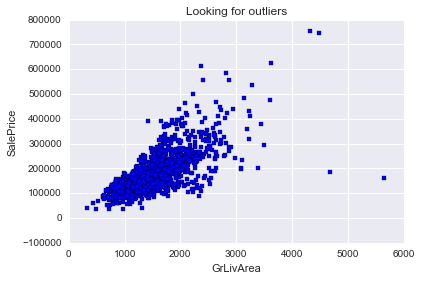

In [144]:
# Looking for outliers, as indicated in https://ww2.amstat.org/publications/jse/v19n3/decock.pdf
plt.scatter(train.GrLivArea, train.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

train = train[train.GrLivArea < 4000]

In [146]:
print("train : " + str(train.shape))

train : (1456, 80)


In [147]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition'])) 
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [148]:
# Log transform the target for official scoring
train.SalePrice = np.log1p(train.SalePrice)
y = train.SalePrice

In [6]:
# Handle missing values for features where median/mean or most common value doesn't make sense

# Alley : data description says NA means "no alley access"
train.loc[:, "Alley"] = train.loc[:, "Alley"].fillna("None")
# BedroomAbvGr : NA most likely means 0
train.loc[:, "BedroomAbvGr"] = train.loc[:, "BedroomAbvGr"].fillna(0)
# BsmtQual etc : data description says NA for basement features is "no basement"
train.loc[:, "BsmtQual"] = train.loc[:, "BsmtQual"].fillna("No")
train.loc[:, "BsmtCond"] = train.loc[:, "BsmtCond"].fillna("No")
train.loc[:, "BsmtExposure"] = train.loc[:, "BsmtExposure"].fillna("No")
train.loc[:, "BsmtFinType1"] = train.loc[:, "BsmtFinType1"].fillna("No")
train.loc[:, "BsmtFinType2"] = train.loc[:, "BsmtFinType2"].fillna("No")
train.loc[:, "BsmtFullBath"] = train.loc[:, "BsmtFullBath"].fillna(0)
train.loc[:, "BsmtHalfBath"] = train.loc[:, "BsmtHalfBath"].fillna(0)
train.loc[:, "BsmtUnfSF"] = train.loc[:, "BsmtUnfSF"].fillna(0)
# CentralAir : NA most likely means No
train.loc[:, "CentralAir"] = train.loc[:, "CentralAir"].fillna("N")
# Condition : NA most likely means Normal
train.loc[:, "Condition1"] = train.loc[:, "Condition1"].fillna("Norm")
train.loc[:, "Condition2"] = train.loc[:, "Condition2"].fillna("Norm")
# EnclosedPorch : NA most likely means no enclosed porch
train.loc[:, "EnclosedPorch"] = train.loc[:, "EnclosedPorch"].fillna(0)
# External stuff : NA most likely means average
train.loc[:, "ExterCond"] = train.loc[:, "ExterCond"].fillna("TA")
train.loc[:, "ExterQual"] = train.loc[:, "ExterQual"].fillna("TA")
# Fence : data description says NA means "no fence"
train.loc[:, "Fence"] = train.loc[:, "Fence"].fillna("No")
# FireplaceQu : data description says NA means "no fireplace"
train.loc[:, "FireplaceQu"] = train.loc[:, "FireplaceQu"].fillna("No")
train.loc[:, "Fireplaces"] = train.loc[:, "Fireplaces"].fillna(0)
# Functional : data description says NA means typical
train.loc[:, "Functional"] = train.loc[:, "Functional"].fillna("Typ")
# GarageType etc : data description says NA for garage features is "no garage"
train.loc[:, "GarageType"] = train.loc[:, "GarageType"].fillna("No")
train.loc[:, "GarageFinish"] = train.loc[:, "GarageFinish"].fillna("No")
train.loc[:, "GarageQual"] = train.loc[:, "GarageQual"].fillna("No")
train.loc[:, "GarageCond"] = train.loc[:, "GarageCond"].fillna("No")
train.loc[:, "GarageArea"] = train.loc[:, "GarageArea"].fillna(0)
train.loc[:, "GarageCars"] = train.loc[:, "GarageCars"].fillna(0)
# HalfBath : NA most likely means no half baths above grade
train.loc[:, "HalfBath"] = train.loc[:, "HalfBath"].fillna(0)
# HeatingQC : NA most likely means typical
train.loc[:, "HeatingQC"] = train.loc[:, "HeatingQC"].fillna("TA")
# KitchenAbvGr : NA most likely means 0
train.loc[:, "KitchenAbvGr"] = train.loc[:, "KitchenAbvGr"].fillna(0)
# KitchenQual : NA most likely means typical
train.loc[:, "KitchenQual"] = train.loc[:, "KitchenQual"].fillna("TA")
# LotFrontage : NA most likely means no lot frontage
train.loc[:, "LotFrontage"] = train.loc[:, "LotFrontage"].fillna(0)
# LotShape : NA most likely means regular
train.loc[:, "LotShape"] = train.loc[:, "LotShape"].fillna("Reg")
# MasVnrType : NA most likely means no veneer
train.loc[:, "MasVnrType"] = train.loc[:, "MasVnrType"].fillna("None")
train.loc[:, "MasVnrArea"] = train.loc[:, "MasVnrArea"].fillna(0)
# MiscFeature : data description says NA means "no misc feature"
train.loc[:, "MiscFeature"] = train.loc[:, "MiscFeature"].fillna("No")
train.loc[:, "MiscVal"] = train.loc[:, "MiscVal"].fillna(0)
# OpenPorchSF : NA most likely means no open porch
train.loc[:, "OpenPorchSF"] = train.loc[:, "OpenPorchSF"].fillna(0)
# PavedDrive : NA most likely means not paved
train.loc[:, "PavedDrive"] = train.loc[:, "PavedDrive"].fillna("N")
# PoolQC : data description says NA means "no pool"
train.loc[:, "PoolQC"] = train.loc[:, "PoolQC"].fillna("No")
train.loc[:, "PoolArea"] = train.loc[:, "PoolArea"].fillna(0)
# SaleCondition : NA most likely means normal sale
train.loc[:, "SaleCondition"] = train.loc[:, "SaleCondition"].fillna("Normal")
# ScreenPorch : NA most likely means no screen porch
train.loc[:, "ScreenPorch"] = train.loc[:, "ScreenPorch"].fillna(0)
# TotRmsAbvGrd : NA most likely means 0
train.loc[:, "TotRmsAbvGrd"] = train.loc[:, "TotRmsAbvGrd"].fillna(0)
# Utilities : NA most likely means all public utilities
train.loc[:, "Utilities"] = train.loc[:, "Utilities"].fillna("AllPub")
# WoodDeckSF : NA most likely means no wood deck
train.loc[:, "WoodDeckSF"] = train.loc[:, "WoodDeckSF"].fillna(0)

In [84]:
def fill_missing(dataset):
    # Handle missing values for features where median/mean or most common value doesn't make sense

    # Alley : data description says NA means "no alley access"
    dataset.loc[:, "Alley"] = dataset.loc[:, "Alley"].fillna("None")
    # BedroomAbvGr : NA most likely means 0
    dataset.loc[:, "BedroomAbvGr"] = dataset.loc[:, "BedroomAbvGr"].fillna(0)
    # BsmtQual etc : data description says NA for basement features is "no basement"
    dataset.loc[:, "BsmtQual"] = dataset.loc[:, "BsmtQual"].fillna("No")
    dataset.loc[:, "BsmtCond"] = dataset.loc[:, "BsmtCond"].fillna("No")
    dataset.loc[:, "BsmtExposure"] = dataset.loc[:, "BsmtExposure"].fillna("No")
    dataset.loc[:, "BsmtFinType1"] = dataset.loc[:, "BsmtFinType1"].fillna("No")
    dataset.loc[:, "BsmtFinType2"] = dataset.loc[:, "BsmtFinType2"].fillna("No")
    dataset.loc[:, "BsmtFullBath"] = dataset.loc[:, "BsmtFullBath"].fillna(0)
    dataset.loc[:, "BsmtHalfBath"] = dataset.loc[:, "BsmtHalfBath"].fillna(0)
    dataset.loc[:, "BsmtUnfSF"] = dataset.loc[:, "BsmtUnfSF"].fillna(0)
    # CentralAir : NA most likely means No
    dataset.loc[:, "CentralAir"] = dataset.loc[:, "CentralAir"].fillna("N")
    # Condition : NA most likely means Normal
    dataset.loc[:, "Condition1"] = dataset.loc[:, "Condition1"].fillna("Norm")
    dataset.loc[:, "Condition2"] = dataset.loc[:, "Condition2"].fillna("Norm")
    # EnclosedPorch : NA most likely means no enclosed porch
    dataset.loc[:, "EnclosedPorch"] = dataset.loc[:, "EnclosedPorch"].fillna(0)
    # External stuff : NA most likely means average
    dataset.loc[:, "ExterCond"] = dataset.loc[:, "ExterCond"].fillna("TA")
    dataset.loc[:, "ExterQual"] = dataset.loc[:, "ExterQual"].fillna("TA")
    # Fence : data description says NA means "no fence"
    dataset.loc[:, "Fence"] = dataset.loc[:, "Fence"].fillna("No")
    # FireplaceQu : data description says NA means "no fireplace"
    dataset.loc[:, "FireplaceQu"] = dataset.loc[:, "FireplaceQu"].fillna("No")
    dataset.loc[:, "Fireplaces"] = dataset.loc[:, "Fireplaces"].fillna(0)
    # Functional : data description says NA means typical
    dataset.loc[:, "Functional"] = dataset.loc[:, "Functional"].fillna("Typ")
    # GarageType etc : data description says NA for garage features is "no garage"
    dataset.loc[:, "GarageType"] = dataset.loc[:, "GarageType"].fillna("No")
    dataset.loc[:, "GarageFinish"] = dataset.loc[:, "GarageFinish"].fillna("No")
    dataset.loc[:, "GarageQual"] = dataset.loc[:, "GarageQual"].fillna("No")
    dataset.loc[:, "GarageCond"] = dataset.loc[:, "GarageCond"].fillna("No")
    dataset.loc[:, "GarageArea"] = dataset.loc[:, "GarageArea"].fillna(0)
    dataset.loc[:, "GarageCars"] = dataset.loc[:, "GarageCars"].fillna(0)
    # HalfBath : NA most likely means no half baths above grade
    dataset.loc[:, "HalfBath"] = dataset.loc[:, "HalfBath"].fillna(0)
    # HeatingQC : NA most likely means typical
    dataset.loc[:, "HeatingQC"] = dataset.loc[:, "HeatingQC"].fillna("TA")
    # KitchenAbvGr : NA most likely means 0
    dataset.loc[:, "KitchenAbvGr"] = dataset.loc[:, "KitchenAbvGr"].fillna(0)
    # KitchenQual : NA most likely means typical
    dataset.loc[:, "KitchenQual"] = dataset.loc[:, "KitchenQual"].fillna("TA")
    # LotFrontage : NA most likely means no lot frontage
    dataset.loc[:, "LotFrontage"] = dataset.loc[:, "LotFrontage"].fillna(0)
    # LotShape : NA most likely means regular
    dataset.loc[:, "LotShape"] = dataset.loc[:, "LotShape"].fillna("Reg")
    # MasVnrType : NA most likely means no veneer
    dataset.loc[:, "MasVnrType"] = dataset.loc[:, "MasVnrType"].fillna("None")
    dataset.loc[:, "MasVnrArea"] = dataset.loc[:, "MasVnrArea"].fillna(0)
    # MiscFeature : data description says NA means "no misc feature"
    dataset.loc[:, "MiscFeature"] = dataset.loc[:, "MiscFeature"].fillna("No")
    dataset.loc[:, "MiscVal"] = dataset.loc[:, "MiscVal"].fillna(0)
    # OpenPorchSF : NA most likely means no open porch
    dataset.loc[:, "OpenPorchSF"] = dataset.loc[:, "OpenPorchSF"].fillna(0)
    # PavedDrive : NA most likely means not paved
    dataset.loc[:, "PavedDrive"] = dataset.loc[:, "PavedDrive"].fillna("N")
    # PoolQC : data description says NA means "no pool"
    dataset.loc[:, "PoolQC"] = dataset.loc[:, "PoolQC"].fillna("No")
    dataset.loc[:, "PoolArea"] = dataset.loc[:, "PoolArea"].fillna(0)
    # SaleCondition : NA most likely means normal sale
    dataset.loc[:, "SaleCondition"] = dataset.loc[:, "SaleCondition"].fillna("Normal")
    # ScreenPorch : NA most likely means no screen porch
    dataset.loc[:, "ScreenPorch"] = dataset.loc[:, "ScreenPorch"].fillna(0)
    # TotRmsAbvGrd : NA most likely means 0
    dataset.loc[:, "TotRmsAbvGrd"] = dataset.loc[:, "TotRmsAbvGrd"].fillna(0)
    # Utilities : NA most likely means all public utilities
    dataset.loc[:, "Utilities"] = dataset.loc[:, "Utilities"].fillna("AllPub")
    # WoodDeckSF : NA most likely means no wood deck
    dataset.loc[:, "WoodDeckSF"] = dataset.loc[:, "WoodDeckSF"].fillna(0)
    
    return dataset

In [109]:
train = fill_missing(train)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,2,2008,WD,Normal,12.248
1,20,RL,80.000,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,No,No,No,0,5,2007,WD,Normal,12.109
2,60,RL,68.000,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,9,2008,WD,Normal,12.317
3,70,RL,60.000,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,No,No,No,0,2,2006,WD,Abnorml,11.849
4,60,RL,84.000,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,No,No,No,0,12,2008,WD,Normal,12.429


### 用test得到test new

In [110]:
test_new = fill_missing(test)
test_new.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,None,Reg,Lvl,AllPub,...,120,0,No,MnPrv,No,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,None,IR1,Lvl,AllPub,...,0,0,No,No,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,None,IR1,Lvl,AllPub,...,0,0,No,MnPrv,No,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,None,IR1,Lvl,AllPub,...,0,0,No,No,No,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,None,IR1,HLS,AllPub,...,144,0,No,No,No,0,1,2010,WD,Normal


In [149]:
all_data = fill_missing(all_data)
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.000,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,No,No,No,0,2,2008,WD,Normal
1,20,RL,80.000,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,0,No,No,No,0,5,2007,WD,Normal
2,60,RL,68.000,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,No,No,No,0,9,2008,WD,Normal
3,70,RL,60.000,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,No,No,No,0,2,2006,WD,Abnorml
4,60,RL,84.000,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,0,No,No,No,0,12,2008,WD,Normal


In [7]:
# Some numerical features are actually really categories
train = train.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [87]:
def num_to_cat(dataset):
    # Some numerical features are actually really categories
    dataset = dataset.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                           50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                           80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                           150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                           "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                       7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                          })
    return dataset

In [150]:
train = num_to_cat(train)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,SC60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,Feb,2008,WD,Normal,12.248
1,SC20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,May,2007,WD,Normal,12.109
2,SC60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,Sep,2008,WD,Normal,12.317
3,SC70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,Feb,2006,WD,Abnorml,11.849
4,SC60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,Dec,2008,WD,Normal,12.429


In [151]:
test_new = num_to_cat(test_new)
test_new.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,3.045,80.000,9.361,1.099,1.609,4,1.386,5,6,...,0,0,0,1,0,0,0,0,1,0
1,1462,3.045,81.000,9.566,1.099,1.386,4,1.386,6,6,...,0,0,0,1,0,0,0,0,1,0
2,1463,4.111,74.000,9.535,1.099,1.386,4,1.386,5,5,...,0,0,0,1,0,0,0,0,1,0
3,1464,4.111,78.000,9.208,1.099,1.386,4,1.386,6,6,...,0,0,0,1,0,0,0,0,1,0
4,1465,4.796,43.000,8.518,1.099,1.386,4,1.386,8,5,...,0,0,0,1,0,0,0,0,1,0


In [152]:
all_data = num_to_cat(all_data)
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,SC60,RL,65.000,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,No,No,No,0,Feb,2008,WD,Normal
1,SC20,RL,80.000,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,0,No,No,No,0,May,2007,WD,Normal
2,SC60,RL,68.000,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,No,No,No,0,Sep,2008,WD,Normal
3,SC70,RL,60.000,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,No,No,No,0,Feb,2006,WD,Abnorml
4,SC60,RL,84.000,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,0,No,No,No,0,Dec,2008,WD,Normal


In [8]:
# Encode some categorical features as ordered numbers when there is information in the order
train = train.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

In [90]:
def order_cat(dataset):
    # Encode some categorical features as ordered numbers when there is information in the order
    dataset = dataset.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                           "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                           "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                             "ALQ" : 5, "GLQ" : 6},
                           "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                             "ALQ" : 5, "GLQ" : 6},
                           "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                           "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                           "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                           "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                           "Min2" : 6, "Min1" : 7, "Typ" : 8},
                           "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                           "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                           "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                           "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                           "Street" : {"Grvl" : 1, "Pave" : 2},
                           "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                         )
    return dataset

In [153]:
train = order_cat(train)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,SC60,RL,65.000,8450,2,nan,4,Lvl,4,Inside,...,0,nan,NaN,NaN,0,Feb,2008,WD,Normal,12.248
1,SC20,RL,80.000,9600,2,nan,4,Lvl,4,FR2,...,0,nan,NaN,NaN,0,May,2007,WD,Normal,12.109
2,SC60,RL,68.000,11250,2,nan,3,Lvl,4,Inside,...,0,nan,NaN,NaN,0,Sep,2008,WD,Normal,12.317
3,SC70,RL,60.000,9550,2,nan,3,Lvl,4,Corner,...,0,nan,NaN,NaN,0,Feb,2006,WD,Abnorml,11.849
4,SC60,RL,84.000,14260,2,nan,3,Lvl,4,FR2,...,0,nan,NaN,NaN,0,Dec,2008,WD,Normal,12.429


In [114]:
test_new = order_cat(test_new)
test_new.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,2,None,4,Lvl,4,...,120,0,0,MnPrv,No,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,2,None,3,Lvl,4,...,0,0,0,No,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,2,None,3,Lvl,4,...,0,0,0,MnPrv,No,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,2,None,3,Lvl,4,...,0,0,0,No,No,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,2,None,3,HLS,4,...,144,0,0,No,No,0,1,2010,WD,Normal


In [154]:
all_data = order_cat(all_data)
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,SC60,RL,65.000,8450,2,None,4,Lvl,4,Inside,...,0,0,0,No,No,0,Feb,2008,WD,Normal
1,SC20,RL,80.000,9600,2,None,4,Lvl,4,FR2,...,0,0,0,No,No,0,May,2007,WD,Normal
2,SC60,RL,68.000,11250,2,None,3,Lvl,4,Inside,...,0,0,0,No,No,0,Sep,2008,WD,Normal
3,SC70,RL,60.000,9550,2,None,3,Lvl,4,Corner,...,0,0,0,No,No,0,Feb,2006,WD,Abnorml
4,SC60,RL,84.000,14260,2,None,3,Lvl,4,FR2,...,0,0,0,No,No,0,Dec,2008,WD,Normal


In [9]:
# Create new features
# 1* Simplifications of existing features
train["SimplOverallQual"] = train.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
train["SimplOverallCond"] = train.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
train["SimplPoolQC"] = train.PoolQC.replace({1 : 1, 2 : 1, # average
                                             3 : 2, 4 : 2 # good
                                            })
train["SimplGarageCond"] = train.GarageCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
train["SimplGarageQual"] = train.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
train["SimplFireplaceQu"] = train.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
train["SimplFireplaceQu"] = train.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
train["SimplFunctional"] = train.Functional.replace({1 : 1, 2 : 1, # bad
                                                     3 : 2, 4 : 2, # major
                                                     5 : 3, 6 : 3, 7 : 3, # minor
                                                     8 : 4 # typical
                                                    })
train["SimplKitchenQual"] = train.KitchenQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
train["SimplHeatingQC"] = train.HeatingQC.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
train["SimplBsmtFinType1"] = train.BsmtFinType1.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
train["SimplBsmtFinType2"] = train.BsmtFinType2.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
train["SimplBsmtCond"] = train.BsmtCond.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
train["SimplBsmtQual"] = train.BsmtQual.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
train["SimplExterCond"] = train.ExterCond.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
train["SimplExterQual"] = train.ExterQual.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })

# 2* Combinations of existing features
# Overall quality of the house
train["OverallGrade"] = train["OverallQual"] * train["OverallCond"]
# Overall quality of the garage
train["GarageGrade"] = train["GarageQual"] * train["GarageCond"]
# Overall quality of the exterior
train["ExterGrade"] = train["ExterQual"] * train["ExterCond"]
# Overall kitchen score
train["KitchenScore"] = train["KitchenAbvGr"] * train["KitchenQual"]
# Overall fireplace score
train["FireplaceScore"] = train["Fireplaces"] * train["FireplaceQu"]
# Overall garage score
train["GarageScore"] = train["GarageArea"] * train["GarageQual"]
# Overall pool score
train["PoolScore"] = train["PoolArea"] * train["PoolQC"]
# Simplified overall quality of the house
train["SimplOverallGrade"] = train["SimplOverallQual"] * train["SimplOverallCond"]
# Simplified overall quality of the exterior
train["SimplExterGrade"] = train["SimplExterQual"] * train["SimplExterCond"]
# Simplified overall pool score
train["SimplPoolScore"] = train["PoolArea"] * train["SimplPoolQC"]
# Simplified overall garage score
train["SimplGarageScore"] = train["GarageArea"] * train["SimplGarageQual"]
# Simplified overall fireplace score
train["SimplFireplaceScore"] = train["Fireplaces"] * train["SimplFireplaceQu"]
# Simplified overall kitchen score
train["SimplKitchenScore"] = train["KitchenAbvGr"] * train["SimplKitchenQual"]
# Total number of bathrooms
train["TotalBath"] = train["BsmtFullBath"] + (0.5 * train["BsmtHalfBath"]) + \
train["FullBath"] + (0.5 * train["HalfBath"])
# Total SF for house (incl. basement)
train["AllSF"] = train["GrLivArea"] + train["TotalBsmtSF"]
# Total SF for 1st + 2nd floors
train["AllFlrsSF"] = train["1stFlrSF"] + train["2ndFlrSF"]
# Total SF for porch
train["AllPorchSF"] = train["OpenPorchSF"] + train["EnclosedPorch"] + \
train["3SsnPorch"] + train["ScreenPorch"]
# Has masonry veneer or not
train["HasMasVnr"] = train.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                               "Stone" : 1, "None" : 0})
# House completed before sale or not
train["BoughtOffPlan"] = train.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                      "Family" : 0, "Normal" : 0, "Partial" : 1})

In [93]:
def new_feature(dataset):
    # Create new features
    # 1* Simplifications of existing features
    dataset["SimplOverallQual"] = dataset.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                           4 : 2, 5 : 2, 6 : 2, # average
                                                           7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                          })
    dataset["SimplOverallCond"] = dataset.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                           4 : 2, 5 : 2, 6 : 2, # average
                                                           7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                          })
    dataset["SimplPoolQC"] = dataset.PoolQC.replace({1 : 1, 2 : 1, # average
                                                 3 : 2, 4 : 2 # good
                                                })
    dataset["SimplGarageCond"] = dataset.GarageCond.replace({1 : 1, # bad
                                                         2 : 1, 3 : 1, # average
                                                         4 : 2, 5 : 2 # good
                                                        })
    dataset["SimplGarageQual"] = dataset.GarageQual.replace({1 : 1, # bad
                                                         2 : 1, 3 : 1, # average
                                                         4 : 2, 5 : 2 # good
                                                        })
    dataset["SimplFireplaceQu"] = dataset.FireplaceQu.replace({1 : 1, # bad
                                                           2 : 1, 3 : 1, # average
                                                           4 : 2, 5 : 2 # good
                                                          })
    dataset["SimplFireplaceQu"] = dataset.FireplaceQu.replace({1 : 1, # bad
                                                           2 : 1, 3 : 1, # average
                                                           4 : 2, 5 : 2 # good
                                                          })
    dataset["SimplFunctional"] = dataset.Functional.replace({1 : 1, 2 : 1, # bad
                                                         3 : 2, 4 : 2, # major
                                                         5 : 3, 6 : 3, 7 : 3, # minor
                                                         8 : 4 # typical
                                                        })
    dataset["SimplKitchenQual"] = dataset.KitchenQual.replace({1 : 1, # bad
                                                           2 : 1, 3 : 1, # average
                                                           4 : 2, 5 : 2 # good
                                                          })
    dataset["SimplHeatingQC"] = dataset.HeatingQC.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
    dataset["SimplBsmtFinType1"] = dataset.BsmtFinType1.replace({1 : 1, # unfinished
                                                             2 : 1, 3 : 1, # rec room
                                                             4 : 2, 5 : 2, 6 : 2 # living quarters
                                                            })
    dataset["SimplBsmtFinType2"] = dataset.BsmtFinType2.replace({1 : 1, # unfinished
                                                             2 : 1, 3 : 1, # rec room
                                                             4 : 2, 5 : 2, 6 : 2 # living quarters
                                                            })
    dataset["SimplBsmtCond"] = dataset.BsmtCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
    dataset["SimplBsmtQual"] = dataset.BsmtQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
    dataset["SimplExterCond"] = dataset.ExterCond.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
    dataset["SimplExterQual"] = dataset.ExterQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })

    # 2* Combinations of existing features
    # Overall quality of the house
    dataset["OverallGrade"] = dataset["OverallQual"] * dataset["OverallCond"]
    # Overall quality of the garage
    dataset["GarageGrade"] = dataset["GarageQual"] * dataset["GarageCond"]
    # Overall quality of the exterior
    dataset["ExterGrade"] = dataset["ExterQual"] * dataset["ExterCond"]
    # Overall kitchen score
    dataset["KitchenScore"] = dataset["KitchenAbvGr"] * dataset["KitchenQual"]
    # Overall fireplace score
    dataset["FireplaceScore"] = dataset["Fireplaces"] * dataset["FireplaceQu"]
    # Overall garage score
    dataset["GarageScore"] = dataset["GarageArea"] * dataset["GarageQual"]
    # Overall pool score
    dataset["PoolScore"] = dataset["PoolArea"] * dataset["PoolQC"]
    # Simplified overall quality of the house
    dataset["SimplOverallGrade"] = dataset["SimplOverallQual"] * dataset["SimplOverallCond"]
    # Simplified overall quality of the exterior
    dataset["SimplExterGrade"] = dataset["SimplExterQual"] * dataset["SimplExterCond"]
    # Simplified overall pool score
    dataset["SimplPoolScore"] = dataset["PoolArea"] * dataset["SimplPoolQC"]
    # Simplified overall garage score
    dataset["SimplGarageScore"] = dataset["GarageArea"] * dataset["SimplGarageQual"]
    # Simplified overall fireplace score
    dataset["SimplFireplaceScore"] = dataset["Fireplaces"] * dataset["SimplFireplaceQu"]
    # Simplified overall kitchen score
    dataset["SimplKitchenScore"] = dataset["KitchenAbvGr"] * dataset["SimplKitchenQual"]
    # Total number of bathrooms
    dataset["TotalBath"] = dataset["BsmtFullBath"] + (0.5 * dataset["BsmtHalfBath"]) + \
    dataset["FullBath"] + (0.5 * dataset["HalfBath"])
    # Total SF for house (incl. basement)
    dataset["AllSF"] = dataset["GrLivArea"] + dataset["TotalBsmtSF"]
    # Total SF for 1st + 2nd floors
    dataset["AllFlrsSF"] = dataset["1stFlrSF"] + dataset["2ndFlrSF"]
    # Total SF for porch
    dataset["AllPorchSF"] = dataset["OpenPorchSF"] + dataset["EnclosedPorch"] + \
    dataset["3SsnPorch"] + dataset["ScreenPorch"]
    # Has masonry veneer or not
    dataset["HasMasVnr"] = dataset.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                                   "Stone" : 1, "None" : 0})
    # House completed before sale or not
    dataset["BoughtOffPlan"] = dataset.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                          "Family" : 0, "Normal" : 0, "Partial" : 1})
    
    return dataset

In [155]:
train = new_feature(train)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SimplPoolScore,SimplGarageScore,SimplFireplaceScore,SimplKitchenScore,TotalBath,AllSF,AllFlrsSF,AllPorchSF,HasMasVnr,BoughtOffPlan
0,SC60,RL,65.000,8450,2,nan,4,Lvl,4,Inside,...,nan,548.000,nan,2,3.500,2566,1710,61,1.000,0
1,SC20,RL,80.000,9600,2,nan,4,Lvl,4,FR2,...,nan,460.000,1.000,1,2.500,2524,1262,0,0.000,0
2,SC60,RL,68.000,11250,2,nan,3,Lvl,4,Inside,...,nan,608.000,1.000,2,3.500,2706,1786,42,1.000,0
3,SC70,RL,60.000,9550,2,nan,3,Lvl,4,Corner,...,nan,642.000,2.000,2,2.000,2473,1717,307,0.000,0
4,SC60,RL,84.000,14260,2,nan,3,Lvl,4,FR2,...,nan,836.000,1.000,2,3.500,3343,2198,84,1.000,0


In [116]:
test_new = new_feature(test_new)
test_new.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SimplPoolScore,SimplGarageScore,SimplFireplaceScore,SimplKitchenScore,TotalBath,AllSF,AllFlrsSF,AllPorchSF,HasMasVnr,BoughtOffPlan
0,1461,20,RH,80.000,11622,2,None,4,Lvl,4,...,0,730.000,0,1,1.000,1778.000,896,120,0,0
1,1462,20,RL,81.000,14267,2,None,3,Lvl,4,...,0,312.000,0,2,1.500,2658.000,1329,36,1,0
2,1463,60,RL,74.000,13830,2,None,3,Lvl,4,...,0,482.000,1,1,2.500,2557.000,1629,34,0,0
3,1464,60,RL,78.000,9978,2,None,3,Lvl,4,...,0,470.000,2,2,2.500,2530.000,1604,36,1,0
4,1465,120,RL,43.000,5005,2,None,3,HLS,4,...,0,506.000,0,2,2.000,2560.000,1280,226,0,0


In [156]:
all_data = new_feature(all_data)
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SimplPoolScore,SimplGarageScore,SimplFireplaceScore,SimplKitchenScore,TotalBath,AllSF,AllFlrsSF,AllPorchSF,HasMasVnr,BoughtOffPlan
0,SC60,RL,65.000,8450,2,None,4,Lvl,4,Inside,...,0,548.000,0,2,3.500,2566.000,1710,61,1,0
1,SC20,RL,80.000,9600,2,None,4,Lvl,4,FR2,...,0,460.000,1,1,2.500,2524.000,1262,0,0,0
2,SC60,RL,68.000,11250,2,None,3,Lvl,4,Inside,...,0,608.000,1,2,3.500,2706.000,1786,42,1,0
3,SC70,RL,60.000,9550,2,None,3,Lvl,4,Corner,...,0,642.000,2,2,2.000,2473.000,1717,307,0,0
4,SC60,RL,84.000,14260,2,None,3,Lvl,4,FR2,...,0,836.000,1,2,3.500,3343.000,2198,84,1,0


In [157]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Find most important features relative to target
SalePrice            1.000
OverallQual          0.819
AllSF                0.817
AllFlrsSF            0.729
GrLivArea            0.719
SimplOverallQual     0.708
ExterQual            0.681
GarageCars           0.680
TotalBath            0.673
KitchenQual          0.667
GarageArea           0.655
BsmtQual             0.653
TotalBsmtSF          0.642
SimplExterQual       0.636
GarageScore          0.618
1stFlrSF             0.614
SimplKitchenQual     0.610
OverallGrade         0.604
FullBath             0.591
YearBuilt            0.589
ExterGrade           0.587
SimplGarageScore     0.585
SimplBsmtQual        0.578
YearRemodAdd         0.569
GarageYrBlt          0.544
TotRmsAbvGrd         0.533
SimplOverallGrade    0.527
SimplKitchenScore    0.523
SimplExterGrade      0.488
Fireplaces           0.487
                     ...  
GarageQual           0.192
GarageGrade          0.184
GarageCond           0.172
PoolQC               0.164
SimplFu

In [11]:
# Create new features
# 3* Polynomials on the top 10 existing features
train["OverallQual-s2"] = train["OverallQual"] ** 2
train["OverallQual-s3"] = train["OverallQual"] ** 3
train["OverallQual-Sq"] = np.sqrt(train["OverallQual"])
train["AllSF-2"] = train["AllSF"] ** 2
train["AllSF-3"] = train["AllSF"] ** 3
train["AllSF-Sq"] = np.sqrt(train["AllSF"])
train["AllFlrsSF-2"] = train["AllFlrsSF"] ** 2
train["AllFlrsSF-3"] = train["AllFlrsSF"] ** 3
train["AllFlrsSF-Sq"] = np.sqrt(train["AllFlrsSF"])
train["GrLivArea-2"] = train["GrLivArea"] ** 2
train["GrLivArea-3"] = train["GrLivArea"] ** 3
train["GrLivArea-Sq"] = np.sqrt(train["GrLivArea"])
train["SimplOverallQual-s2"] = train["SimplOverallQual"] ** 2
train["SimplOverallQual-s3"] = train["SimplOverallQual"] ** 3
train["SimplOverallQual-Sq"] = np.sqrt(train["SimplOverallQual"])
train["ExterQual-2"] = train["ExterQual"] ** 2
train["ExterQual-3"] = train["ExterQual"] ** 3
train["ExterQual-Sq"] = np.sqrt(train["ExterQual"])
train["GarageCars-2"] = train["GarageCars"] ** 2
train["GarageCars-3"] = train["GarageCars"] ** 3
train["GarageCars-Sq"] = np.sqrt(train["GarageCars"])
train["TotalBath-2"] = train["TotalBath"] ** 2
train["TotalBath-3"] = train["TotalBath"] ** 3
train["TotalBath-Sq"] = np.sqrt(train["TotalBath"])
train["KitchenQual-2"] = train["KitchenQual"] ** 2
train["KitchenQual-3"] = train["KitchenQual"] ** 3
train["KitchenQual-Sq"] = np.sqrt(train["KitchenQual"])
train["GarageScore-2"] = train["GarageScore"] ** 2
train["GarageScore-3"] = train["GarageScore"] ** 3
train["GarageScore-Sq"] = np.sqrt(train["GarageScore"])

In [98]:
def poly_feature(dataset):
    # Create new features
    # 3* Polynomials on the top 10 existing features
    dataset["OverallQual-s2"] = dataset["OverallQual"] ** 2
    dataset["OverallQual-s3"] = dataset["OverallQual"] ** 3
    dataset["OverallQual-Sq"] = np.sqrt(dataset["OverallQual"])
    dataset["AllSF-2"] = dataset["AllSF"] ** 2
    dataset["AllSF-3"] = dataset["AllSF"] ** 3
    dataset["AllSF-Sq"] = np.sqrt(dataset["AllSF"])
    dataset["AllFlrsSF-2"] = dataset["AllFlrsSF"] ** 2
    dataset["AllFlrsSF-3"] = dataset["AllFlrsSF"] ** 3
    dataset["AllFlrsSF-Sq"] = np.sqrt(dataset["AllFlrsSF"])
    dataset["GrLivArea-2"] = dataset["GrLivArea"] ** 2
    dataset["GrLivArea-3"] = dataset["GrLivArea"] ** 3
    dataset["GrLivArea-Sq"] = np.sqrt(dataset["GrLivArea"])
    dataset["SimplOverallQual-s2"] = dataset["SimplOverallQual"] ** 2
    dataset["SimplOverallQual-s3"] = dataset["SimplOverallQual"] ** 3
    dataset["SimplOverallQual-Sq"] = np.sqrt(dataset["SimplOverallQual"])
    dataset["ExterQual-2"] = dataset["ExterQual"] ** 2
    dataset["ExterQual-3"] = dataset["ExterQual"] ** 3
    dataset["ExterQual-Sq"] = np.sqrt(dataset["ExterQual"])
    dataset["GarageCars-2"] = dataset["GarageCars"] ** 2
    dataset["GarageCars-3"] = dataset["GarageCars"] ** 3
    dataset["GarageCars-Sq"] = np.sqrt(dataset["GarageCars"])
    dataset["TotalBath-2"] = dataset["TotalBath"] ** 2
    dataset["TotalBath-3"] = dataset["TotalBath"] ** 3
    dataset["TotalBath-Sq"] = np.sqrt(dataset["TotalBath"])
    dataset["KitchenQual-2"] = dataset["KitchenQual"] ** 2
    dataset["KitchenQual-3"] = dataset["KitchenQual"] ** 3
    dataset["KitchenQual-Sq"] = np.sqrt(dataset["KitchenQual"])
    dataset["GarageScore-2"] = dataset["GarageScore"] ** 2
    dataset["GarageScore-3"] = dataset["GarageScore"] ** 3
    dataset["GarageScore-Sq"] = np.sqrt(dataset["GarageScore"])
    
    return dataset

In [158]:
train = poly_feature(train)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,GarageCars-Sq,TotalBath-2,TotalBath-3,TotalBath-Sq,KitchenQual-2,KitchenQual-3,KitchenQual-Sq,GarageScore-2,GarageScore-3,GarageScore-Sq
0,SC60,RL,65.000,8450,2,nan,4,Lvl,4,Inside,...,1.414,12.250,42.875,1.871,16,64,2.000,2702736.000,4443297984.000,40.546
1,SC20,RL,80.000,9600,2,nan,4,Lvl,4,FR2,...,1.414,6.250,15.625,1.581,9,27,1.732,1904400.000,2628072000.000,37.148
2,SC60,RL,68.000,11250,2,nan,3,Lvl,4,Inside,...,1.414,12.250,42.875,1.871,16,64,2.000,3326976.000,6068404224.000,42.708
3,SC70,RL,60.000,9550,2,nan,3,Lvl,4,Corner,...,1.732,4.000,8.000,1.414,16,64,2.000,3709476.000,7144450776.000,43.886
4,SC60,RL,84.000,14260,2,nan,3,Lvl,4,FR2,...,1.732,12.250,42.875,1.871,16,64,2.000,6290064.000,15775480512.000,50.080


In [119]:
test_new = poly_feature(test_new)
test_new.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageCars-Sq,TotalBath-2,TotalBath-3,TotalBath-Sq,KitchenQual-2,KitchenQual-3,KitchenQual-Sq,GarageScore-2,GarageScore-3,GarageScore-Sq
0,1461,20,RH,80.000,11622,2,None,4,Lvl,4,...,1.000,1.000,1.000,1.000,9,27,1.732,4796100.000,10503459000.000,46.797
1,1462,20,RL,81.000,14267,2,None,3,Lvl,4,...,1.000,2.250,3.375,1.225,16,64,2.000,876096.000,820025856.000,30.594
2,1463,60,RL,74.000,13830,2,None,3,Lvl,4,...,1.414,6.250,15.625,1.581,9,27,1.732,2090916.000,3023464536.000,38.026
3,1464,60,RL,78.000,9978,2,None,3,Lvl,4,...,1.414,6.250,15.625,1.581,16,64,2.000,1988100.000,2803221000.000,37.550
4,1465,120,RL,43.000,5005,2,None,3,HLS,4,...,1.414,4.000,8.000,1.414,16,64,2.000,2304324.000,3497963832.000,38.962


In [159]:
all_data = poly_feature(all_data)
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,GarageCars-Sq,TotalBath-2,TotalBath-3,TotalBath-Sq,KitchenQual-2,KitchenQual-3,KitchenQual-Sq,GarageScore-2,GarageScore-3,GarageScore-Sq
0,SC60,RL,65.000,8450,2,None,4,Lvl,4,Inside,...,1.414,12.250,42.875,1.871,16,64,2.000,2702736.000,4443297984.000,40.546
1,SC20,RL,80.000,9600,2,None,4,Lvl,4,FR2,...,1.414,6.250,15.625,1.581,9,27,1.732,1904400.000,2628072000.000,37.148
2,SC60,RL,68.000,11250,2,None,3,Lvl,4,Inside,...,1.414,12.250,42.875,1.871,16,64,2.000,3326976.000,6068404224.000,42.708
3,SC70,RL,60.000,9550,2,None,3,Lvl,4,Corner,...,1.732,4.000,8.000,1.414,16,64,2.000,3709476.000,7144450776.000,43.886
4,SC60,RL,84.000,14260,2,None,3,Lvl,4,FR2,...,1.732,12.250,42.875,1.871,16,64,2.000,6290064.000,15775480512.000,50.080


In [160]:
# train
# Differentiate numerical features (minus the target) and categorical features
categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
train_num = train[numerical_features]
train_cat = train[categorical_features]

Numerical features : 118
Categorical features : 25


### 因为有第一列ID

In [121]:
# test_new
# Differentiate numerical features (minus the target) and categorical features
categorical_features = test_new.select_dtypes(include = ["object"]).columns
numerical_features = test_new.select_dtypes(exclude = ["object"]).columns
# numerical_features = numerical_features.drop("SalePrice")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
test_new_num = test_new[numerical_features]
test_new_cat = test_new[categorical_features]

Numerical features : 120
Categorical features : 24


In [161]:
# all_data
# Differentiate numerical features (minus the target) and categorical features
categorical_features = all_data.select_dtypes(include = ["object"]).columns
numerical_features = all_data.select_dtypes(exclude = ["object"]).columns
# numerical_features = numerical_features.drop("SalePrice")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
all_data_num = all_data[numerical_features]
all_data_cat = all_data[categorical_features]

Numerical features : 117
Categorical features : 26


In [162]:
# Handle remaining missing values for numerical features by using median as replacement
print("NAs for numerical features in train : " + str(train_num.isnull().values.sum()))
train_num = train_num.fillna(train_num.median())
print("Remaining NAs for numerical features in train : " + str(train_num.isnull().values.sum()))

NAs for numerical features in train : 11431
Remaining NAs for numerical features in train : 0


In [123]:
# Handle remaining missing values for numerical features by using median as replacement
print("NAs for numerical features in test_new : " + str(test_new_num.isnull().values.sum()))
test_new_num = test_new_num.fillna(test_new_num.median())
print("Remaining NAs for numerical features in test_new : " + str(test_new_num.isnull().values.sum()))

NAs for numerical features in test_new : 85
Remaining NAs for numerical features in test_new : 0


In [163]:
# Handle remaining missing values for numerical features by using median as replacement
print("NAs for numerical features in all_data : " + str(all_data_num.isnull().values.sum()))
all_data_num = all_data_num.fillna(all_data_num.median())
print("Remaining NAs for numerical features in all_data : " + str(all_data_num.isnull().values.sum()))

NAs for numerical features in all_data : 166
Remaining NAs for numerical features in all_data : 0


In [164]:
# Log transform of the skewed numerical features to lessen impact of outliers
# Inspired by Alexandru Papiu's script : https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models
# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
skewness = train_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
train_num[skewed_features] = np.log1p(train_num[skewed_features])

87 skewed numerical features to log transform


In [125]:
# Log transform of the skewed numerical features to lessen impact of outliers
# Inspired by Alexandru Papiu's script : https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models
# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
skewness = test_new_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
test_new_num[skewed_features] = np.log1p(test_new_num[skewed_features])

87 skewed numerical features to log transform


In [165]:
# Log transform of the skewed numerical features to lessen impact of outliers
# Inspired by Alexandru Papiu's script : https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models
# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
skewness = all_data_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
all_data_num[skewed_features] = np.log1p(all_data_num[skewed_features])

86 skewed numerical features to log transform


In [166]:
# Create dummy features for categorical values via one-hot encoding
print("NAs for categorical features in train : " + str(train_cat.isnull().values.sum()))
train_cat = pd.get_dummies(train_cat)
print("Remaining NAs for categorical features in train : " + str(train_cat.isnull().values.sum()))

NAs for categorical features in train : 2749
Remaining NAs for categorical features in train : 0


In [127]:
# Create dummy features for categorical values via one-hot encoding
print("NAs for categorical features in test_new : " + str(test_new_cat.isnull().values.sum()))
test_new_cat = pd.get_dummies(test_new_cat)
print("Remaining NAs for categorical features in test_new : " + str(test_new_cat.isnull().values.sum()))

NAs for categorical features in test_new : 7
Remaining NAs for categorical features in test_new : 0


In [167]:
# Create dummy features for categorical values via one-hot encoding
print("NAs for categorical features in all_data : " + str(all_data_cat.isnull().values.sum()))
all_data_cat = pd.get_dummies(all_data_cat)
print("Remaining NAs for categorical features in all_data : " + str(all_data_cat.isnull().values.sum()))

NAs for categorical features in all_data : 8
Remaining NAs for categorical features in all_data : 0


In [128]:
test_new.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageCars-Sq,TotalBath-2,TotalBath-3,TotalBath-Sq,KitchenQual-2,KitchenQual-3,KitchenQual-Sq,GarageScore-2,GarageScore-3,GarageScore-Sq
0,1461,20,RH,80.000,11622,2,None,4,Lvl,4,...,1.000,1.000,1.000,1.000,9,27,1.732,4796100.000,10503459000.000,46.797
1,1462,20,RL,81.000,14267,2,None,3,Lvl,4,...,1.000,2.250,3.375,1.225,16,64,2.000,876096.000,820025856.000,30.594
2,1463,60,RL,74.000,13830,2,None,3,Lvl,4,...,1.414,6.250,15.625,1.581,9,27,1.732,2090916.000,3023464536.000,38.026
3,1464,60,RL,78.000,9978,2,None,3,Lvl,4,...,1.414,6.250,15.625,1.581,16,64,2.000,1988100.000,2803221000.000,37.550
4,1465,120,RL,43.000,5005,2,None,3,HLS,4,...,1.414,4.000,8.000,1.414,16,64,2.000,2304324.000,3497963832.000,38.962


In [130]:
# Join categorical and numerical features
train = pd.concat([train_num, train_cat], axis = 1)
print("New number of features : " + str(train.shape[1]))

New number of features : 295


In [131]:
# Join categorical and numerical features
test_new = pd.concat([test_new_num, test_new_cat], axis = 1)
print("New number of features : " + str(test_new.shape[1]))

New number of features : 281


In [168]:
# Join categorical and numerical features
all_data = pd.concat([all_data_num, all_data_cat], axis = 1)
print("New number of features : " + str(all_data.shape[1]))

New number of features : 320


In [133]:
test_new.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,3.045,80.000,9.361,1.099,1.609,4,1.386,5,6,...,0,0,0,1,0,0,0,0,1,0
1,1462,3.045,81.000,9.566,1.099,1.386,4,1.386,6,6,...,0,0,0,1,0,0,0,0,1,0
2,1463,4.111,74.000,9.535,1.099,1.386,4,1.386,5,5,...,0,0,0,1,0,0,0,0,1,0
3,1464,4.111,78.000,9.208,1.099,1.386,4,1.386,6,6,...,0,0,0,1,0,0,0,0,1,0
4,1465,4.796,43.000,8.518,1.099,1.386,4,1.386,8,5,...,0,0,0,1,0,0,0,0,1,0


In [169]:
train.shape[0]

1456

In [170]:
train = all_data[:train.shape[0]]
test = all_data[train.shape[0]:]

In [171]:
y.head()

0   12.248
1   12.109
2   12.317
3   11.849
4   12.429
Name: SalePrice, dtype: float64

In [134]:
# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1022, 295)
X_test : (438, 295)
y_train : (1022,)
y_test : (438,)


In [172]:
# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1019, 320)
X_test : (437, 320)
y_train : (1019,)
y_test : (437,)


In [173]:
# Standardize numerical features
stdSc = StandardScaler()
X_train.loc[:, numerical_features] = stdSc.fit_transform(X_train.loc[:, numerical_features])
X_test.loc[:, numerical_features] = stdSc.transform(X_test.loc[:, numerical_features])

In [174]:
# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

('RMSE on Training set :', 0.2994379109222855)
('RMSE on Test set :', 0.38449735311625766)


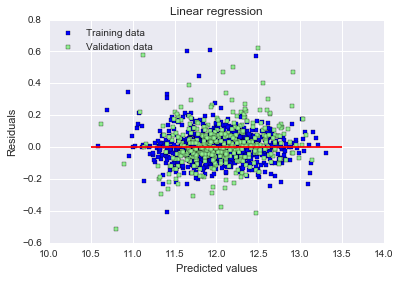

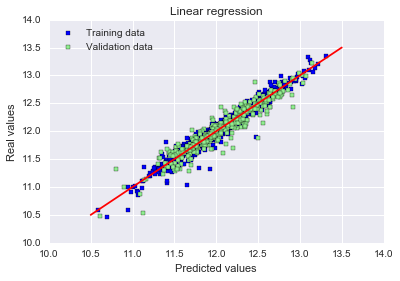

In [175]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

('Best alpha :', 30.0)
Try again for more precision with alphas centered around 30.0
('Best alpha :', 22.5)
('Ridge RMSE on Training set :', 0.11517100992467055)
('Ridge RMSE on Test set :', 0.11636013229778504)


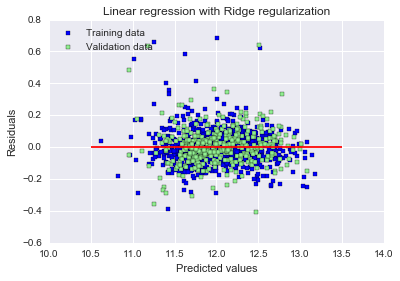

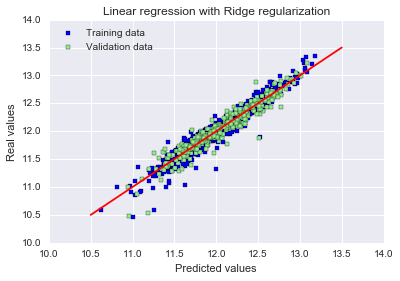

Ridge picked 316 features and eliminated the other 4 features


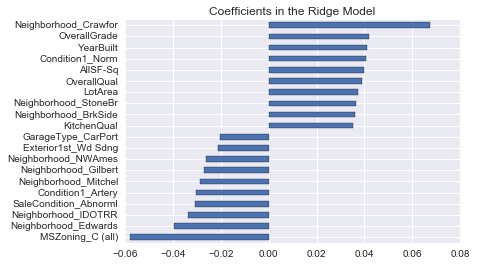

In [176]:
# 2* Ridge
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()


('Best alpha :', 0.00059999999999999995)
Try again for more precision with alphas centered around 0.0006
('Best alpha :', 0.00059999999999999995)
('Lasso RMSE on Training set :', 0.11403954212405014)
('Lasso RMSE on Test set :', 0.11585280771533035)


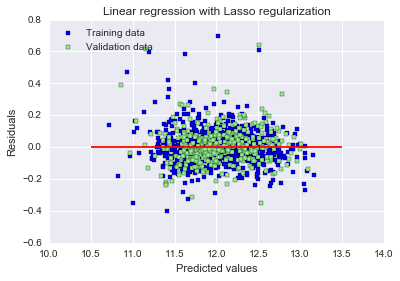

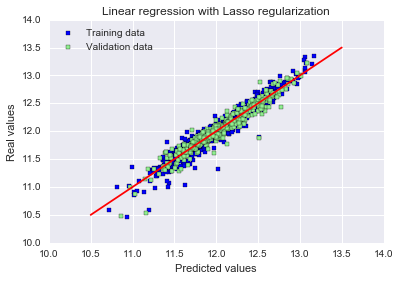

Lasso picked 112 features and eliminated the other 208 features


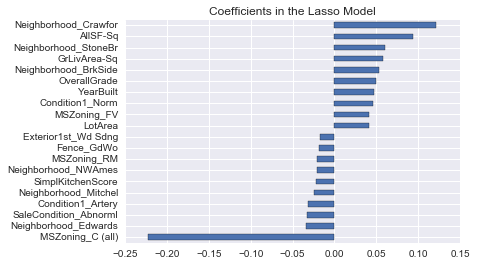

In [177]:
# 3* Lasso
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

# Plot residuals
plt.scatter(y_train_las, y_train_las - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_las - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_las, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

In [180]:
X_train.head()

,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
328,-1.720,0.533,0.063,-0.930,0.031,0.227,-0.058,0.475,-1.775,0.436,...,0,0,0,1,0,0,0,0,1,0
1026,0.467,0.031,0.063,0.671,0.031,0.227,-0.794,-0.421,-0.338,-1.221,...,0,0,0,1,0,0,0,0,1,0
843,0.677,-0.277,0.063,0.671,0.031,0.227,-0.794,-1.480,-0.306,-1.173,...,0,0,0,1,0,0,0,0,1,0
994,1.156,0.629,0.063,0.671,0.031,0.227,2.886,-0.421,1.129,1.070,...,0,0,0,1,0,0,0,0,1,0
1226,0.856,0.953,0.063,-0.930,0.031,0.227,-0.058,-0.421,1.161,1.070,...,0,0,0,1,0,0,0,0,1,0


In [181]:
X_test.head()

,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
511,-0.522,-0.611,0.063,-0.930,0.031,0.227,0.678,-0.421,1.098,1.021,...,0,1,0,0,0,0,0,0,0,1
963,1.934,0.539,0.063,-0.930,0.031,0.227,2.150,-0.421,1.161,1.070,...,0,0,0,1,0,0,0,0,1,0
231,3.492,1.027,0.063,-0.930,0.031,0.227,1.414,-0.421,0.781,0.534,...,0,0,0,1,0,0,0,0,1,0
688,0.077,-0.254,0.063,0.671,0.031,0.227,1.414,0.475,1.161,1.070,...,0,1,0,0,0,0,0,0,0,1
34,0.077,-0.460,0.063,0.671,0.031,0.227,2.150,-0.421,1.098,0.973,...,0,0,0,1,0,0,0,0,1,0


In [182]:
test.head()

,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,80.000,9.361,1.099,1.609,1.609,1.386,5,1.946,7.582,1961,...,0,0,0,1,0,0,0,0,1,0
1,81.000,9.566,1.099,1.386,1.609,1.386,6,1.946,7.580,1958,...,0,0,0,1,0,0,0,0,1,0
2,74.000,9.535,1.099,1.386,1.609,1.386,5,1.792,7.600,1998,...,0,0,0,1,0,0,0,0,1,0
3,78.000,9.208,1.099,1.386,1.609,1.386,6,1.946,7.600,1998,...,0,0,0,1,0,0,0,0,1,0
4,43.000,8.518,1.099,1.386,1.609,1.386,8,1.792,7.597,1992,...,0,0,0,1,0,0,0,0,1,0


In [183]:
y_pred_lasso = lasso.predict(test)

In [185]:
y_pred_lasso

array([ 90.59653003,  62.86892549,  74.88361726, ...,  81.39766545,
        39.54093941,  87.80713916])

In [186]:
y_pred_lasso = np.exp(y_pred_lasso)

In [187]:
y_pred_lasso

array([  2.21601691e+39,   2.01199745e+27,   3.32308738e+32, ...,
         2.24159394e+35,   1.48734526e+17,   1.36193383e+38])

In [26]:
pred_df = pd.DataFrame(y_pred_lasso, index=test_new["Id"], columns=["SalePrice"])
pred_df.to_csv('output.csv', header=True, index_label='Id')

In [188]:
# Get data
test_data = pd.read_csv("test.csv")
print("test : " + str(test_data.shape))

test : (1459, 80)


In [189]:
pred_df = pd.DataFrame(y_pred_lasso, index=test_data["Id"], columns=["SalePrice"])
pred_df.to_csv('output_lasso.csv', header=True, index_label='Id')

Your Best Entry 
Your submission scored 63.88211, which is not an improvement of your best score. Keep trying!